In [1]:
%%html
<script
  src="https://code.jquery.com/jquery-3.7.1.slim.min.js"
  integrity="sha256-kmHvs0B+OpCW5GVHUNjv9rOmY0IvSIRcf7zGUDTDQM8="
  crossorigin="anonymous"></script>
<script 
  src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.7/require.min.js" 
  integrity="sha512-J5ha2LF4Le+PBQnI5+xAVJDR+sZG9uSgroy4n/A6TLjNkvYQbqZA8WHZdaOvJ0HiKkBC9Frmvs10rFDSHKmveQ==" 
  crossorigin="anonymous" 
  referrerpolicy="no-referrer"></script>

In [2]:
import plotly
plotly.__version__

'5.24.0'

In [3]:
# Setup for plotly outputs.
import plotly.io as pio
pio.renderers.default = "notebook_connected+plotly_mimetype"

New columns have been added to the sample metadata for the `Ag3` and `Af1` resources containing data about quality control metrics. 

This includes columns containing depth of coverage summary statistics:

* `mean_cov` - Mean depth of coverage over the whole genome.
* `median_cov` - Median depth of coverage over the whole genome.
* `modal_cov` - Modal depth of coverage over the whole genome.
* `frac_gen_cov` - Fraction of the genome covered with at least one read.
* `divergence` - Fraction of aligned bases mismatching the reference genome.

Also columns `mean_cov_{contig}`, `median_cov_{contig}` and `modal_cov_{contig}` are available for each contig.

Also included are summary statistics from cross-contamination estimation:

* `contam_pct` - Estimated percentage cross-contamination.
* `contam_LLR` - Log likelihood ratio for contamination estimation.

These columns are available via the `sample_metadata()` function. Here's an example showing some of these new columns for samples in the `Ag3` resource:

In [4]:
import malariagen_data
ag3 = malariagen_data.Ag3()

In [5]:
# Hide progress for the blog post.
ag3._show_progress = False

In [9]:
# Load sample metadata.
df_samples = ag3.sample_metadata()

# Inspect all available columns.
df_samples.columns

Index(['sample_id', 'partner_sample_id', 'contributor', 'country', 'location',
       'year', 'month', 'latitude', 'longitude', 'sex_call', 'sample_set',
       'release', 'quarter', 'study_id', 'study_url',
       'terms_of_use_expiry_date', 'terms_of_use_url', 'unrestricted_use',
       'mean_cov', 'median_cov', 'modal_cov', 'mean_cov_2L', 'median_cov_2L',
       'mode_cov_2L', 'mean_cov_2R', 'median_cov_2R', 'mode_cov_2R',
       'mean_cov_3L', 'median_cov_3L', 'mode_cov_3L', 'mean_cov_3R',
       'median_cov_3R', 'mode_cov_3R', 'mean_cov_X', 'median_cov_X',
       'mode_cov_X', 'frac_gen_cov', 'divergence', 'contam_pct', 'contam_LLR',
       'aim_species_fraction_arab', 'aim_species_fraction_colu',
       'aim_species_fraction_colu_no2l', 'aim_species_gambcolu_arabiensis',
       'aim_species_gambiae_coluzzii', 'aim_species', 'country_iso',
       'admin1_name', 'admin1_iso', 'admin2_name', 'taxon',
       'cohort_admin1_year', 'cohort_admin1_month', 'cohort_admin1_quarter',
      

In [ ]:
# View sample metadata for some of the new columns.
df_samples[[
    "sample_id",
    "sample_set",
    "mean_cov",
    "median_cov",
    "modal_cov",
    "frac_gen_cov",
    "divergence",
    "contam_pct",
]]

,sample_id,sample_set,mean_cov,median_cov,modal_cov,frac_gen_cov,divergence,contam_pct
0,VBS00256-4651STDY7017184,1177-VO-ML-LEHMANN-VMF00004,26.86,26,24,0.939,0.02061,3.572
1,VBS00257-4651STDY7017185,1177-VO-ML-LEHMANN-VMF00004,31.59,31,30,0.942,0.02058,3.337
2,VBS00259-4651STDY7017186,1177-VO-ML-LEHMANN-VMF00004,35.31,35,36,0.944,0.02014,2.29
3,VBS00262-4651STDY7017187,1177-VO-ML-LEHMANN-VMF00004,30.08,29,30,0.941,0.02034,3.502
4,VBS00277-4651STDY7017189,1177-VO-ML-LEHMANN-VMF00004,31.09,30,30,0.943,0.02028,3.127
...,...,...,...,...,...,...,...,...
19766,SAMN15222632,tennessen-2021,28.12,28,29,0.94,0.02014,1.177
19767,SAMN15222633,tennessen-2021,30.31,31,33,0.939,0.01997,1.229
19768,SAMN15222634,tennessen-2021,25.49,25,26,0.939,0.0201,1.02
19769,SAMN15222635,tennessen-2021,20.13,20,20,0.939,0.02026,0.939


As part of data curation, only samples which pass standard thresholds for these QC metrics are included in each released dataset in the vector observatory. However, these metrics may be useful if you want to investigate the values of QC metrics in a particular sample set, or apply stricter thresholds.

For example, here is a histogram of coverage values for an example sample set:

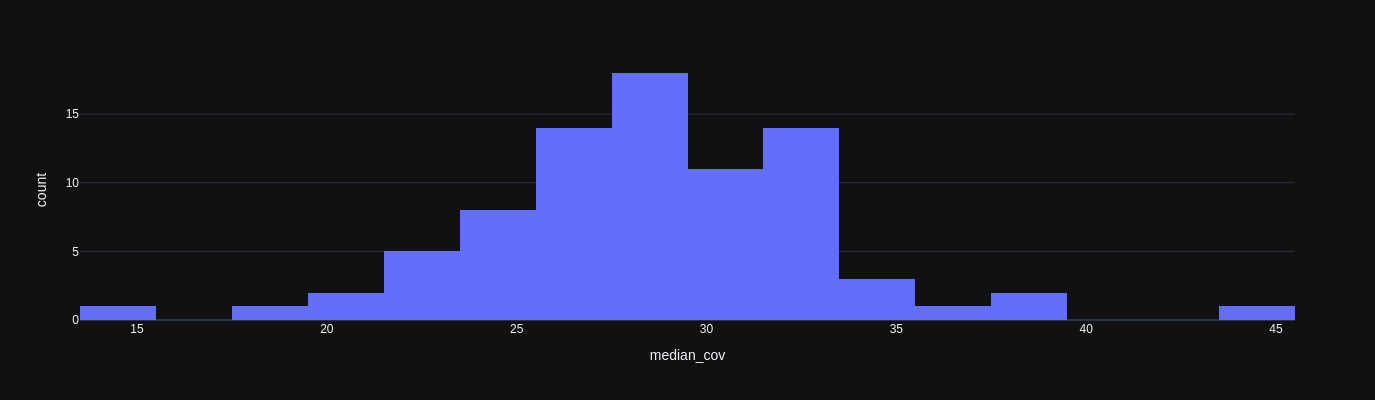

In [7]:
import plotly.express as px

df = df_samples.query("sample_set == 'AG1000G-AO'")
px.histogram(
    df, 
    x="median_cov",
    width=700,
    height=400,
    template="plotly_dark",
)

For example, query samples where coverage is greater than 20X:

In [8]:
df_samples.query("median_cov > 20")

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,VBS00256-4651STDY7017184,GP97,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
1,VBS00257-4651STDY7017185,GP98,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
2,VBS00259-4651STDY7017186,GP100,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
3,VBS00262-4651STDY7017187,GP103,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
4,VBS00277-4651STDY7017189,GP118,Tovi Lehmann,Mali,Dallowere,2012,6,13.616,-7.037,F,...,Koulikouro,ML-2,Banamba,coluzzii,ML-2_colu_2012,ML-2_colu_2012_06,ML-2_colu_2012_Q2,ML-2_Banamba_colu_2012,ML-2_Banamba_colu_2012_06,ML-2_Banamba_colu_2012_Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19765,SAMN15222631,D341,Jacob Tennessen,Burkina Faso,Tengrela,2016,-1,10.700,-4.800,F,...,Cascades,BF-02,Comoe,coluzzii,BF-02_colu_2016,BF-02_colu_2016,BF-02_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016
19766,SAMN15222632,D342,Jacob Tennessen,Burkina Faso,Tengrela,2016,-1,10.700,-4.800,F,...,Cascades,BF-02,Comoe,coluzzii,BF-02_colu_2016,BF-02_colu_2016,BF-02_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016
19767,SAMN15222633,D343,Jacob Tennessen,Burkina Faso,Tengrela,2016,-1,10.700,-4.800,F,...,Cascades,BF-02,Comoe,coluzzii,BF-02_colu_2016,BF-02_colu_2016,BF-02_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016
19768,SAMN15222634,D346,Jacob Tennessen,Burkina Faso,Tengrela,2016,-1,10.700,-4.800,F,...,Cascades,BF-02,Comoe,coluzzii,BF-02_colu_2016,BF-02_colu_2016,BF-02_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016,BF-02_Comoe_colu_2016
